In [71]:
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
def BayesianClasifier(x, clusters):

    '''
    Bayesian Clasifier
    
    ----------
    Paramaters
    ----------
    
    - x: data to be classified
    - clusters:
   
        
    ------
    Return
    ------
    Index which shows what cluster x belongs to
    '''
    k = len(clusters)
    clusters = np.array(clusters)
    d = len(clusters[0][0]) #Dimensions 
    sizeCluster = []
    
    for i in range (0, k):
        #Compute size of cluster
        sizeCluster.append(len(clusters[i]))
        
    n = np.sum(sizeCluster) #Total number of Data
        
    covarianceCluster = []
    meanCluster = []
    solutions = []
    for i in range (0, k):
        
        #Compute mean of cluster
        meanCluster.append([np.average([clusters[i][:,j]]) for j in range(0, d)])
        
        #Compute the stimated covariance matrix of cluster
        aux = np.zeros((d,d))
        for j in range (0, len(clusters[i])):
            nDisper = np.subtract(clusters[i][j], meanCluster[i])
            product = np.outer(nDisper,nDisper)
            aux = aux + product
        aux = aux/sizeCluster[i]
        covarianceCluster.append(aux)
        
        
        #Compute the goal function for the cluster. 
        #We will compute the function in multiple steps
        
        #First we find the distance between point x and cluster's mean
        aux = np.subtract(x, meanCluster[i]) 
        
        #The convarianze matrix hasnt necessarily an inverse, but we assume if we have many dimensions and data, it will.
        inverse = np.linalg.inv(covarianceCluster[i])
        
        aux2 = np.dot(aux,inverse) 
        aux2 = np.dot(aux2,aux)
        
        #Now we can calculate the whole objective funciont
        #Np.linalg.norm gives the Frobenius norm for a matrix
        solutions.append((aux2 + np.log(np.linalg.norm(covarianceCluster[i]) -2*np.log(sizeCluster[i]/n))))
        
    #We return the index which minices our goal function
    return solutions.index(min(solutions))

In [79]:
def clusterPlot(x,k,clusters, xAxis, yAxis,):
    '''
    Draw all members of a cluster list and the point x in the cluster k.
    
    ----------
    Paramaters
    ----------
    - x = single point
    - k = cluster which x belongs to
    - clusters: Clusters list and each cluster is a data Matrix of points
    - xAxis: coordinate x in graphic.
    - yAxis: coordinate y in graphic.
    '''
    for i in range (0, len(clusters)):
        c = clusters[i]
        p = plt.plot(c[:,xAxis], c[:,yAxis], 'o')
        if (k == i):
            plt.plot(x[xAxis], x[yAxis],'x', color = p[-1].get_color()) #Last used color, so it belongs to i-cluster
    plt.show()

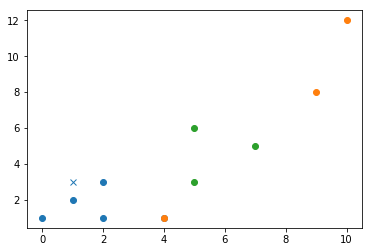

In [84]:
clusters = [np.array([[2, 3],
       [4, 1],
       [2, 1],
       [0, 1],
       [1, 2]]), np.array([[9, 8],
       [4, 1],[10,12]]), np.array([[5, 3],
       [5, 6],
       [7, 5]])]

x = np.array([1,3])
clusterPlot(x,BayesianClasifier(x, clusters),clusters, 0,1)